<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/220215_financial_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

In [7]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np

In [9]:
# tickers = ['GLD', 'IS0E.DE']
tickers= ['TSLA']
i=0
df = np.array
for ticker in tickers:
  df[i] = yf.download(ticker, 
                      start='2019-01-01', 
                      end='2021-01-31', 
                      progress=False)
  i= i+1

for ticker in df:
  print(ticker.head())

TypeError: ignored

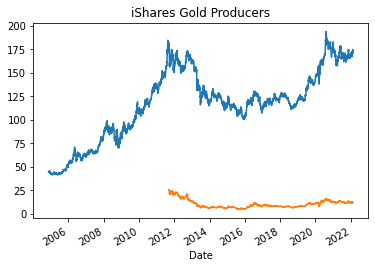

In [ ]:
gldTicker = yf.Ticker('GLD')
ishareTicker = yf.Ticker('IS0E.DE')
tesla = yf.Ticker('TSLA')

gld_df = gldTicker.history(period="max")
ish_df = ishareTicker.history(period="max")

gld_df['Close'].plot(title="SPDR Gold Shares")
ish_df['Close'].plot(title="iShares Gold Producers")

check: https://github.com/ranaroussi/yfinance

In [ ]:
tesla.balance_sheet

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Intangible Assets,2.570000e+08,3.130000e+08,3.390000e+08,2.820000e+08
Capital Surplus,2.980300e+10,2.726000e+10,1.273600e+10,1.024900e+10
Total Liab,3.054800e+10,2.846900e+10,2.619900e+10,2.342700e+10
Total Stockholder Equity,3.018900e+10,2.222500e+10,6.618000e+09,4.923000e+09
Minority Interest,1.394000e+09,1.454000e+09,1.492000e+09,1.390000e+09
Other Current Liab,4.756000e+09,4.147000e+09,3.693000e+09,2.955000e+09
Total Assets,6.213100e+10,5.214800e+10,3.430900e+10,2.974000e+10
Common Stock,1.000000e+06,1.000000e+06,1.000000e+06,NaN
Other Current Assets,3.450000e+08,2.380000e+08,2.460000e+08,1.930000e+08
Retained Earnings,3.310000e+08,-5.399000e+09,-6.083000e+09,-5.318000e+09


we will now attempt a standardizaton of these values

In [ ]:
# prepare data for standardization
values1 = gld_df['Close'].values
values1 = values1.reshape((len(values1), 1))

values2 = ish_df['Close'].values
values2 = values2.reshape((len(values2), 1))

# train the standardization
scaler1 = StandardScaler()
scaler1 = scaler1.fit(values1)
print('Mean: %f, StandardDeviation: %f' % (scaler1.mean_, sqrt(scaler1.var_)))

scaler2 = StandardScaler()
scaler2 = scaler2.fit(values2)
print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))


# standardization the dataset and print the first 5 rows
normalized1 = scaler1.transform(values1)
print('normalized values1')
for i in range(5):
	print(normalized1[i])
 
normalized2 = scaler2.transform(values2)
print('normalized values2')
for i in range(5):
	print(normalized2[i])

# inverse transform and print the first 5 rows
inversed1 = scaler1.inverse_transform(normalized1)
print('inversed1')
for i in range(5):
	print(inversed1[i])
 
inversed2 = scaler2.inverse_transform(normalized2)
print('inversed2')
for i in range(5):
	print(inversed2[i])

Mean: 116.672002, StandardDeviation: 36.834584
Mean: 10.368136, StandardDeviation: 4.197551
normalized values1
[-1.96261213]
[-1.95175284]
[-1.94713756]
[-1.95256726]
[-1.94442276]
normalized values2
[3.53937652]
[3.48318415]
[3.67880553]
[3.58479608]
[3.11542955]
inversed1
[44.38000107]
[44.77999878]
[44.95000076]
[44.75]
[45.04999924]
inversed2
[25.2248497]
[24.98897934]
[25.81011009]
[25.41550064]
[23.44531059]


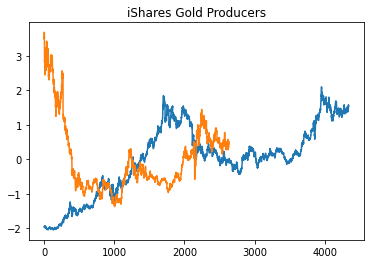

In [ ]:
pd.Series(normalized1.flatten()).plot(title="SPDR Gold Shares")
pd.Series(normalized2.flatten()).plot(title="iShares Gold Producers")